<a href="https://colab.research.google.com/github/SterlingHayden/Machine-Learning/blob/main/SVM/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sterling Hayden  
Jacob Brecheisen  
DASC 4113  
09/28/2023  
# Group 7: Support Vector Machines

## Datasets


### Breast Cancer Dataset
https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/

In [ ]:
import pandas as pd

# reading in the data
df_breast = pd.read_csv('/content/breast-cancer.csv')
pd.set_option('display.max_columns', None)
df_breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The dataset comprises a total of 32 columns. Out of these, one column, denoted as 'diagnosis' is binary, and it serves as our primary focus for prediction, making it our Y or response variable. The remaining 31 columns consist of quantitative data, and these constitute our X or feature values.

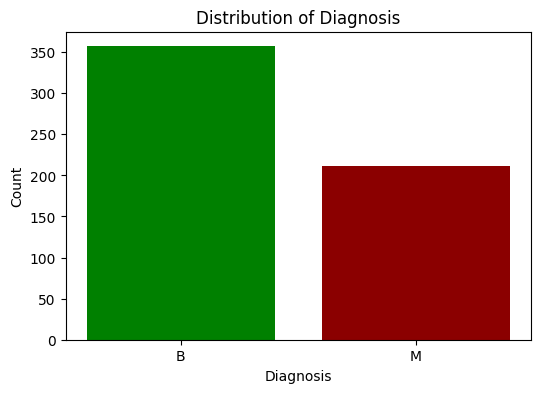

In [ ]:
##### looking into our response varriable
# counting the num of Malignant & Benign tumors
class_counts = df_breast['diagnosis'].value_counts()

# Histogram of diagnosis variable
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['green', 'darkred'])
plt.title("Distribution of Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

Proportionally, there is a **higher occurrence of benign tumors as opposed to malignant tumors**, which is indeed a positive observation. The reason for this positivity lies in the fact that benign tumors are non-cancerous, while malignant tumors are characterized by their cancerous nature.

<ipython-input-4-a18d5b28bf50>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_breast.corr()


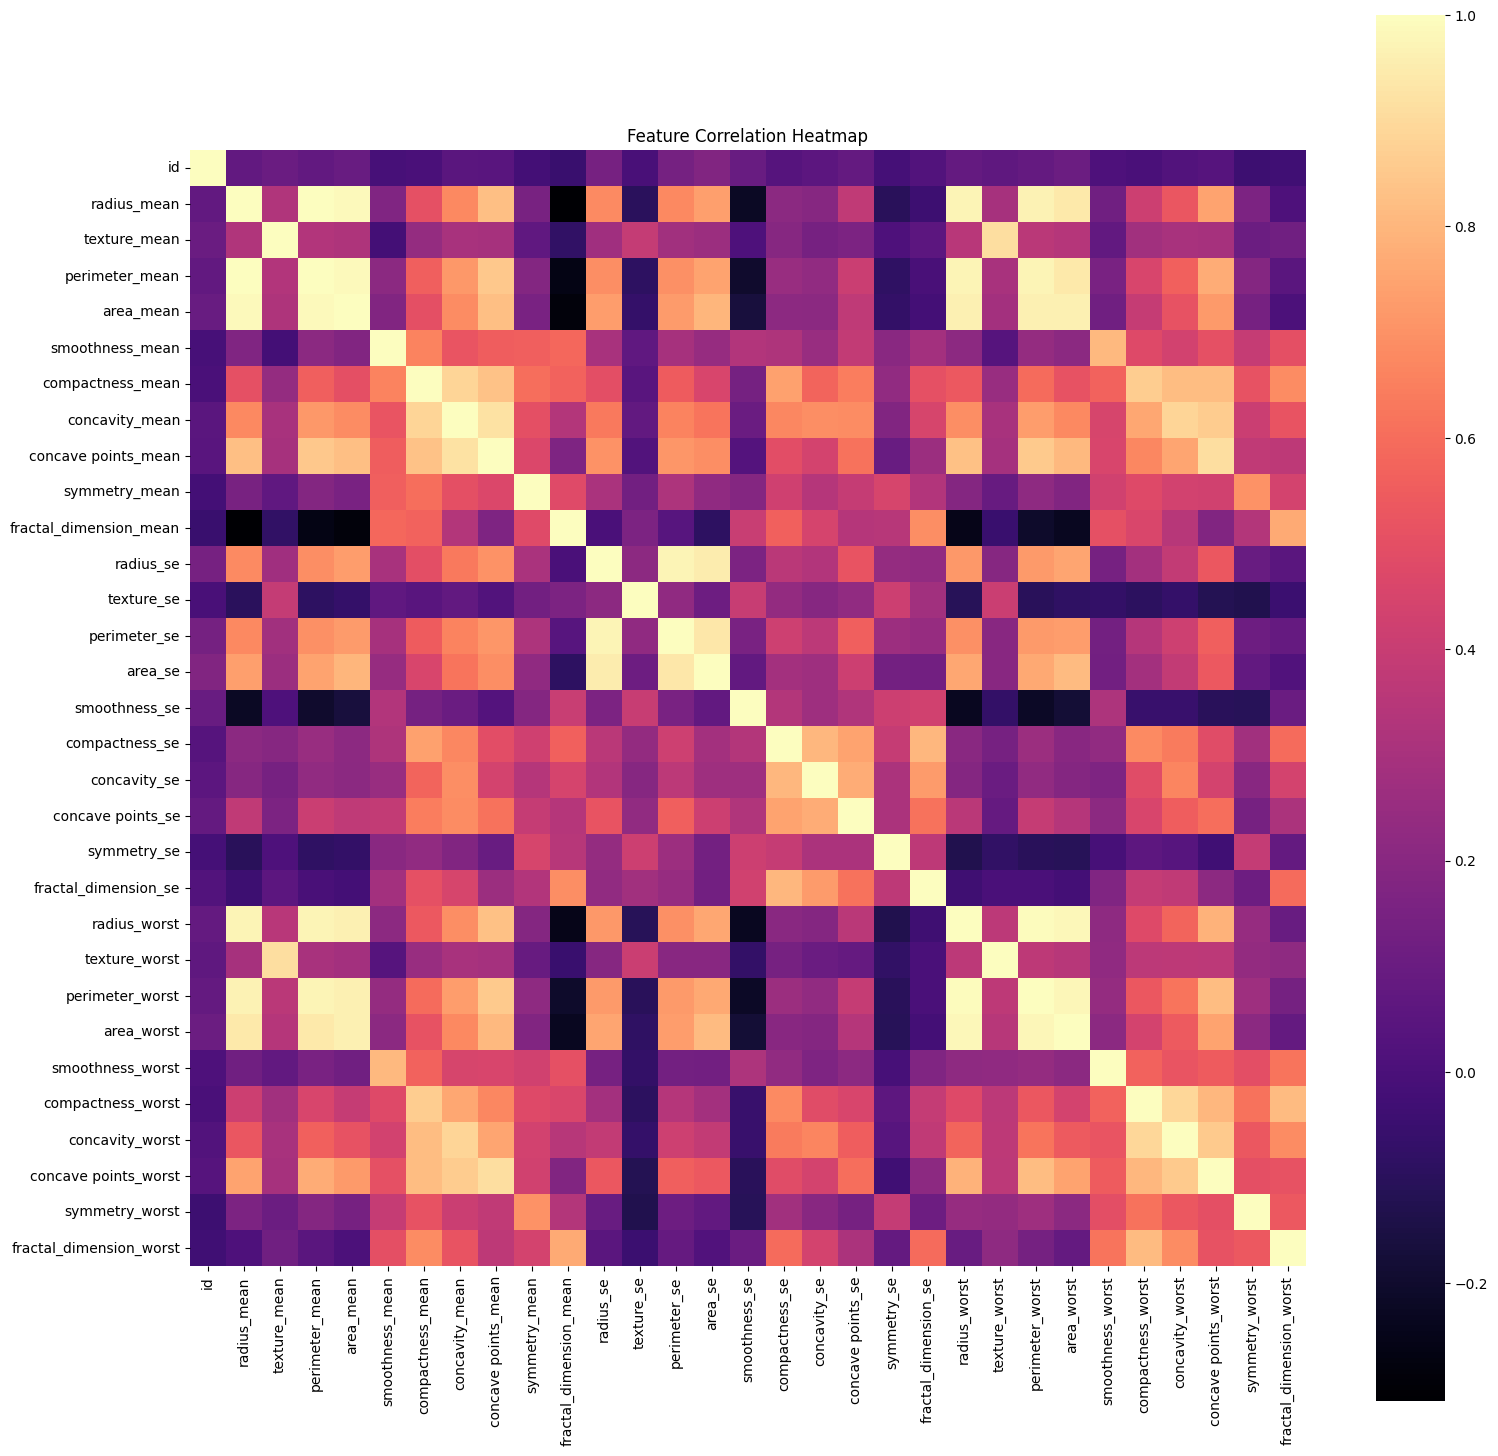

In [ ]:
import seaborn as sns
corr_matrix = df_breast.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=False, cmap='magma', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

It's evident that **there are multicollinearity issues present**, a challenge that support vector machines often grapple with. To address this, we should consider removing features exhibiting multicollinearity.

In [ ]:
##########  Variance Inflation Factor (VIF) to detect
from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating and df of only features
df_X = df_breast.loc[:, df_breast.columns != 'diagnosis']

# VIF df
vif_df = pd.DataFrame()
vif_df['feature'] = df_X.columns

# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(df_X.values, i)
                          for i in range(len(df_X.columns))]

print(vif_df)

                    feature           VIF
0                        id      1.163246
1               radius_mean  63309.441555
2              texture_mean    251.432664
3            perimeter_mean  58123.587378
4                 area_mean   1287.411538
5           smoothness_mean    393.514898
6          compactness_mean    201.166758
7            concavity_mean    157.899635
8       concave points_mean    154.297834
9             symmetry_mean    184.429153
10   fractal_dimension_mean    629.688286
11                radius_se    237.257123
12               texture_se     24.758627
13             perimeter_se    211.410744
14                  area_se     73.436569
15            smoothness_se     26.330278
16           compactness_se     44.948568
17             concavity_se     33.254271
18        concave points_se     54.030035
19              symmetry_se     37.207715
20     fractal_dimension_se     27.549724
21             radius_worst   9677.820028
22            texture_worst    343

Woah!! Those VIF scores are crazy high. Typically, any value greater than 10 signifies significant multicollinearity that requires attention. Let's proceed to systematically remove features one by one until all remaining VIF values are less than or equal to 10.

In [ ]:
# a function to find the feature with the highest VIF
def vif_calc(df):

  vif_df = pd.DataFrame()
  vif_df['feature'] = df_X.columns

  # calculating VIF for each feature
  vif_df["VIF"] = [variance_inflation_factor(df_X.values, i)
                            for i in range(len(df_X.columns))]

  return vif_df.iloc[vif_df['VIF'].idxmax()]

In [ ]:
vif_calc(df_X)

feature     radius_mean
VIF        63309.441555
Name: 1, dtype: object

This would take too long to drop column by column, lets automate it!

In [ ]:
# function to recursevly drop the column with the highest VIF until all remaining VIF scores <= 10
def drop_high_vif_columns(df, threshold=10):
    while True:
        # Calculate VIF for each feature
        vif_df = pd.DataFrame()
        vif_df['feature'] = df.columns
        vif_df["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

        # Find the column with the highest VIF
        max_vif_column = vif_df['feature'][vif_df['VIF'].idxmax()]
        max_vif_value = vif_df['VIF'].max()

        if max_vif_value <= threshold:
            print("All VIF values are <= 10")
            break

        # Drop the column with the highest VIF
        df = df.drop(columns=[max_vif_column])
        print(f"Dropped column '{max_vif_column}' with VIF {max_vif_value}")

    return df

In [ ]:
# lets check out what was dropped from the df
df_X = drop_high_vif_columns(df_X, threshold=10)

Dropped column 'radius_mean' with VIF 63309.44155488838
Dropped column 'radius_worst' with VIF 7575.973632389072
Dropped column 'perimeter_mean' with VIF 3902.4789380785896
Dropped column 'perimeter_worst' with VIF 668.3858531469428
Dropped column 'fractal_dimension_mean' with VIF 508.1372005262634
Dropped column 'smoothness_worst' with VIF 368.1133960615419
Dropped column 'texture_worst' with VIF 309.5476438609189
Dropped column 'fractal_dimension_worst' with VIF 184.83455550917665
Dropped column 'symmetry_worst' with VIF 167.4022277397584
Dropped column 'concavity_mean' with VIF 142.3352540574706
Dropped column 'radius_se' with VIF 105.3929846965655
Dropped column 'concave points_worst' with VIF 101.01108189342041
Dropped column 'smoothness_mean' with VIF 87.05054513967563
Dropped column 'compactness_mean' with VIF 74.83262406774472
Dropped column 'area_mean' with VIF 67.50148881868829
Dropped column 'compactness_worst' with VIF 49.02670346166551
Dropped column 'perimeter_se' with VI

In [ ]:
# our remaining df
df_X

,id,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,concavity_worst
0,842302,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.7119
1,842517,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.2416
2,84300903,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.4504
3,84348301,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.6869
4,84358402,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.4000
...,...,...,...,...,...,...,...,...
564,926424,1.2560,158.70,0.010300,0.05198,0.01114,0.004239,0.4107
565,926682,2.4630,99.04,0.005769,0.03950,0.01898,0.002498,0.3215
566,926954,1.0750,48.55,0.005903,0.04730,0.01318,0.003892,0.3403
567,927241,1.5950,86.22,0.006522,0.07117,0.02324,0.006185,0.9387


### Happiness Dataset
https://www.kaggle.com/datasets/priyanshusethi/happiness-classification-dataset

In [ ]:
# reading in the data
df_happy = pd.read_csv('/content/happydata.csv')
pd.set_option('display.max_columns', None)
df_happy.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


The dataset comprises a total of 7 columns. Out of these, one column, denoted as 'happy' is binary, and it serves as our primary focus for prediction, making it our Y or response variable. The remaining 6 columns consist of quantitative data, and these constitute our X or feature values.

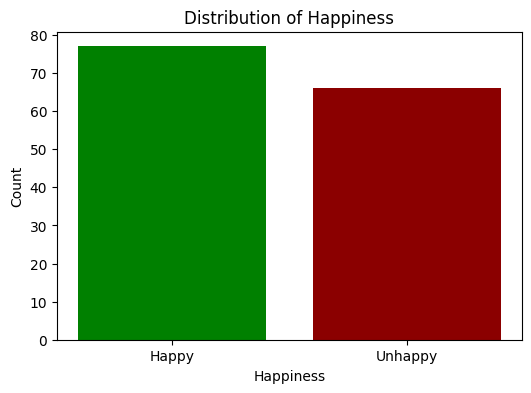

In [ ]:
##### looking into our response varriable
# counting the number of happy and unhappy citizens
class_counts = df_happy['happy'].map({0: "Unhappy", 1: "Happy"}).value_counts()

# Histogram of diagnosis variable
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['green', 'darkred'])
plt.title("Distribution of Happiness")
plt.xlabel("Happiness")
plt.ylabel("Count")
plt.show()

Proportionally, there is a **higher occurrence of happy citizens as opposed to unhappy citizens**, which is indeed a positive observation.

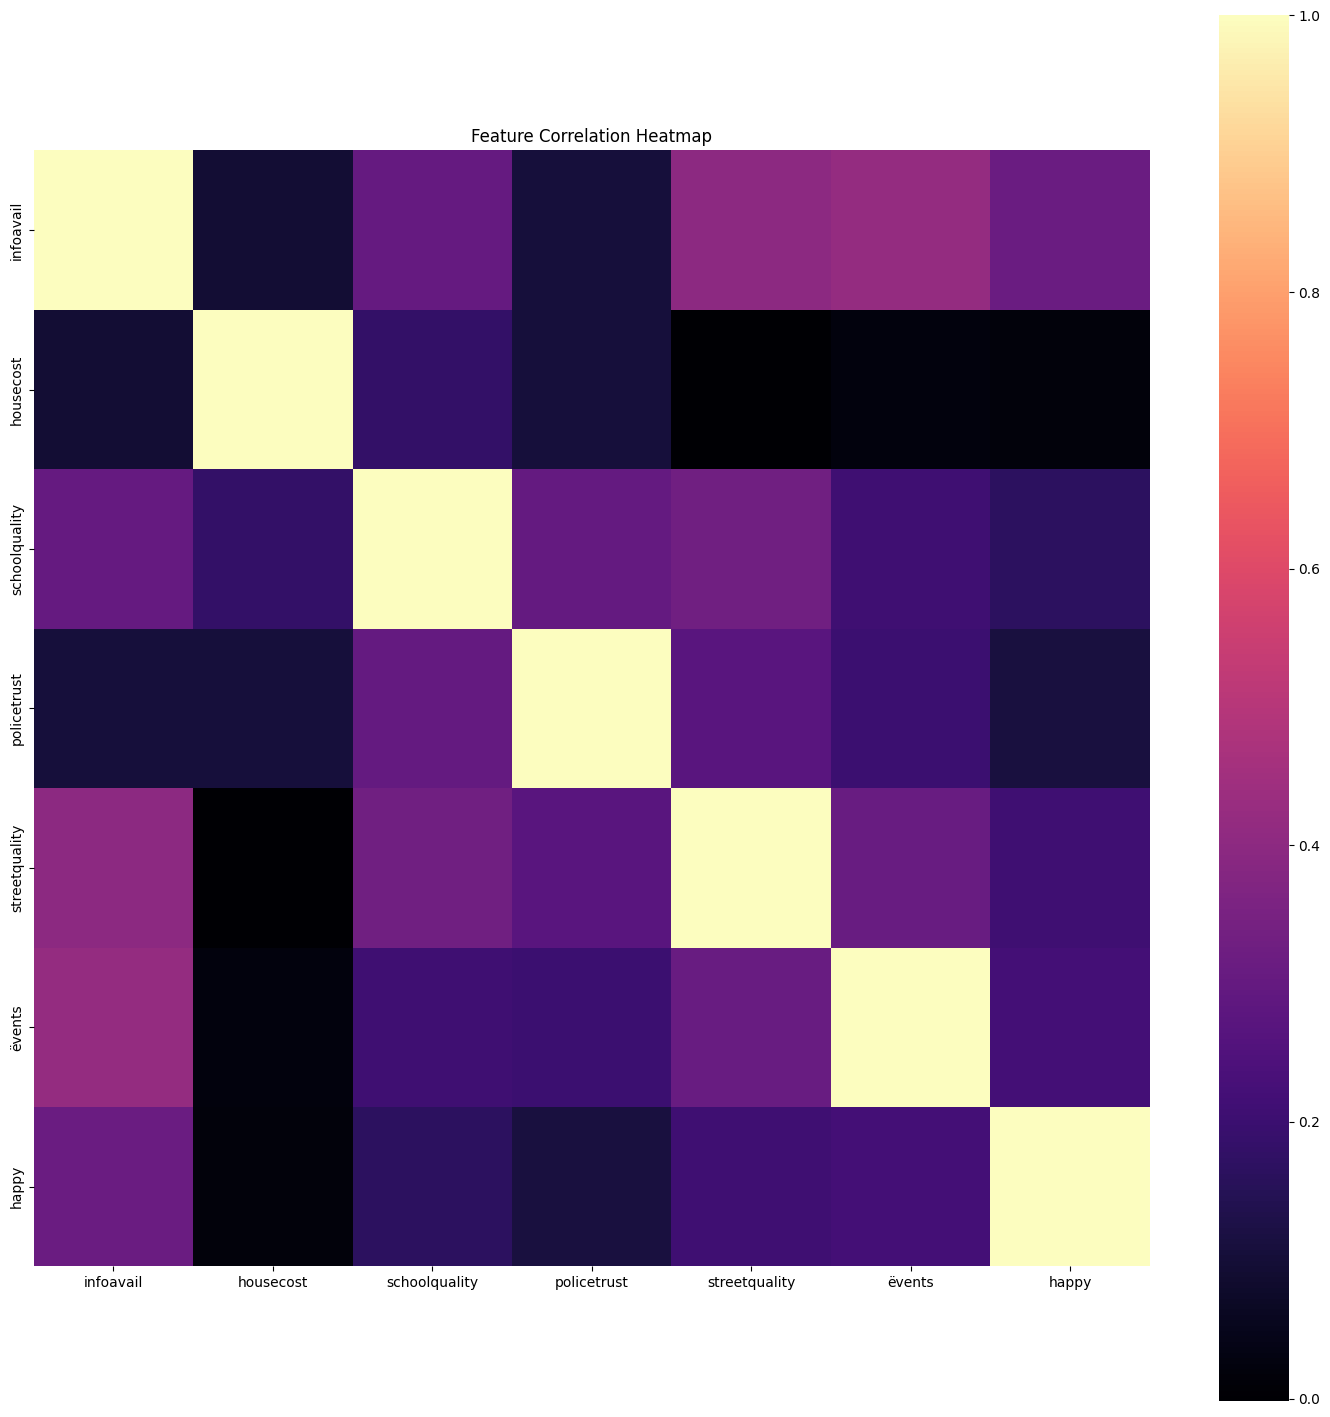

In [ ]:
corr_matrix = df_happy.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=False, cmap='magma', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

There do not appear to be multicollinearity issues present. All variables are relatively uncorrelated with one another.

## Maximal Marginal Classifier and its Limitations
The Maximal Margin Classifier seeks to find a hyperplane that maximizes the margin between two classes in binary classification. It **represents a strict, ideal separation between classes by focusing on support vectors, but is sensitive to outliers and noise.** To create a Maximal Margin Classifier, an optimization process is typically employed to locate the ideal hyperplane. An alternative approach is to set the regularization parameter, C, to a very high value. When C is significantly large, the SVM model enforces a narrower margin and dedicates itself to minimizing classification errors.

In [ ]:
# packages for Maximal Marginal Classifier
from sklearn.model_selection import train_test_split  # train test split made easy
from sklearn.svm import SVC # SVC = Sipport vector Classifier, finds hyperplane that best splits classes
from sklearn.preprocessing import StandardScaler # used for feature scaling, needed for standerdizing in our case
from sklearn.metrics import accuracy_score  # calc accuracy mad easy

In [ ]:
# firsts lets make the respose/y varriable
df_y = df_breast['diagnosis']
# now lets transform the y 'M' and 'B' to binary
df_y = df_y.map({'M': 0, 'B': 1})

In [ ]:
# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=88)

# Standardize the features, AKA each feature has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Support Vector Classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1000)  #We can manipulate the C value here

# Fit the SVM model to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


Dang we did pretty good for a Maximal Marginal Classifier! The accuracy value of approximately 0.956 means that our Support Vector Classifier (SVC) model correctly classified about 95.6% of the instances in the test dataset. This is a good accuracy rate, indicating that our model is performing well on the test data. Note that we can not plot the hyperplane due to the amount of features used.

## Support Vector Classifier
**The Support Vector Classifier (SVC), is the practical implementation of the Maximal Margin Classifier**. It allows for more flexibility by finding the optimal hyperplane that maximizes the margin while tolerating some classification errors, making it suitable for real-world datasets that may not be perfectly separable. In essence, the Maximal Margin Classifier is a theoretical ideal, while the SVC is the practical application of the SVM approach.

In [ ]:
# packages for Support Vector Classifier
from sklearn.model_selection import train_test_split  # train test split made easy
from sklearn.svm import SVC # SVC = Sipport vector Classifier, finds hyperplane that best splits classes
from sklearn.preprocessing import StandardScaler # used for feature scaling, needed for standerdizing in our case
from sklearn.metrics import accuracy_score  # calc accuracy mad easy
from sklearn.metrics import confusion_matrix # for confusion matrix

In [ ]:
# firsts lets make the respose/y varriable
df_y = df_breast['diagnosis']
# now lets transform the y 'M' and 'B' to binary
df_y = df_y.map({'M': 0, 'B': 1})

In [ ]:
# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=88)

# Standardize the features, AKA each feature has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1000]  # Lets try out a range of values for C
for C in C_vals:
  # Create a Support Vector Classifier with a linear kernel
  svm_classifier = SVC(kernel='linear', C=C)

  # Fit the SVM model to the training data
  svm_classifier.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = svm_classifier.predict(X_test)

  # Calculate the accuracy of the model
  accuracy = accuracy_score(y_test, y_pred)
  print(f'C = {C}: Accuracy = {accuracy:.4f}')

C = 0.05: Accuracy = 0.9649
C = 0.1: Accuracy = 0.9737
C = 0.2: Accuracy = 0.9825
C = 0.3: Accuracy = 0.9737
C = 0.4: Accuracy = 0.9649
C = 0.5: Accuracy = 0.9649
C = 0.6: Accuracy = 0.9649
C = 0.7: Accuracy = 0.9649
C = 0.8: Accuracy = 0.9649
C = 0.9: Accuracy = 0.9649
C = 1.0: Accuracy = 0.9649
C = 1000: Accuracy = 0.9561


As observed, models that offer greater flexibility by identifying the optimal hyperplane that maximizes the margin, even if they tolerate some classification errors, outperform a strictly enforced model like the Maximal Margin Classifier (C = 1000). This is why we often refer to Support Vector Classifiers as the practical realization of the Maximal Margin Classifier.Note that we can not plot the hyperplane due to the amount of features used.

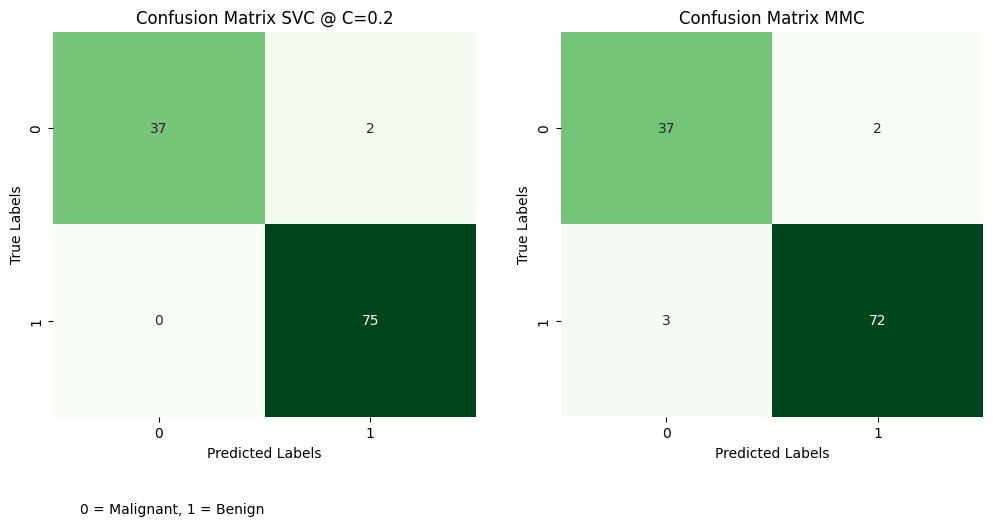

In [ ]:
# Create and train the Maximal Margin Classifier for C=0.2
svm_classifier_1 = SVC(kernel='linear', C=0.2)
svm_classifier_1.fit(X_train, y_train)

# Create and train the Maximal Margin Classifier for C=1000
svm_classifier_2 = SVC(kernel='linear', C=1000)
svm_classifier_2.fit(X_train, y_train)

# Make predictions on the test data for both models
y_pred_1 = svm_classifier_1.predict(X_test)
y_pred_2 = svm_classifier_2.predict(X_test)

# Calculate the confusion matrices
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first confusion matrix (C=0.2)
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_title('Confusion Matrix SVC @ C=0.2')
axes[0].text(0.5, -0.25, '0 = Malignant, 1 = Benign', horizontalalignment='right', transform=axes[0].transAxes)

# Plot the second confusion matrix (C=1000)
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Confusion Matrix MMC')

plt.show()

As demonstrated in the results above, the **Support Vector Classifier with C=0.2 exhibits improved performance in correctly classifying Benign tumors**. Its accuracy in predicting Malignant Tumors remains unchanged. In practical scenarios, we would likely prefer for the model to overpredict Malignant tumors, as they are cancerous. Achieving this outcome would involve adjusting the loss function, a topic best explored in future discussions.


## Support Vector Machines and Nonlinear Decision Boundaries


Support Vector Machines (SVMs) can be extended to handle datasets with nonlinear decision boundaries. While traditional SVC focuses on linear separations, SVMs with nonlinear decision boundaries utilize kernel functions to transform the input data into a higher-dimensional space where linear separation is possible. This allows SVMs to capture complex, nonlinear relationships between features.

In [ ]:
# first lets make our explanatorry/X variable
df_X = df_happy.iloc[:, :-1]
# then lets make the respose/y variable
df_y = df_happy.iloc[:, -1]

In [ ]:
from itertools import product

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=88)

# Standardize the features, AKA each feature has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1000]  # Lets try out a range of values for C
kernels = ["linear", "poly", "rbf", "sigmoid"] # Lets try out some different kernel types

accuracy = 0

for C, kernel in product(C_vals, kernels):
  # Create a Support Vector Classifier with a linear kernel
  svm_classifier = SVC(kernel=kernel, C=C)

  # Fit the SVM model to the training data
  svm_classifier.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = svm_classifier.predict(X_test)

  if accuracy_score(y_test, y_pred) >= accuracy:
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"C = {C}, kernel = '{kernel}': Accuracy = {accuracy:.4f}")

C = 0.05, kernel = 'linear': Accuracy = 0.7931
C = 0.1, kernel = 'linear': Accuracy = 0.7931
C = 0.3, kernel = 'linear': Accuracy = 0.7931
C = 0.3, kernel = 'rbf': Accuracy = 0.8276
C = 0.5, kernel = 'linear': Accuracy = 0.8276
C = 0.6, kernel = 'linear': Accuracy = 0.8276
C = 0.9, kernel = 'poly': Accuracy = 0.8621
C = 1.0, kernel = 'poly': Accuracy = 0.8621


As expected, certain kernels enabled us to better capture the non-linear relationships in the dataset and increase accuracy.

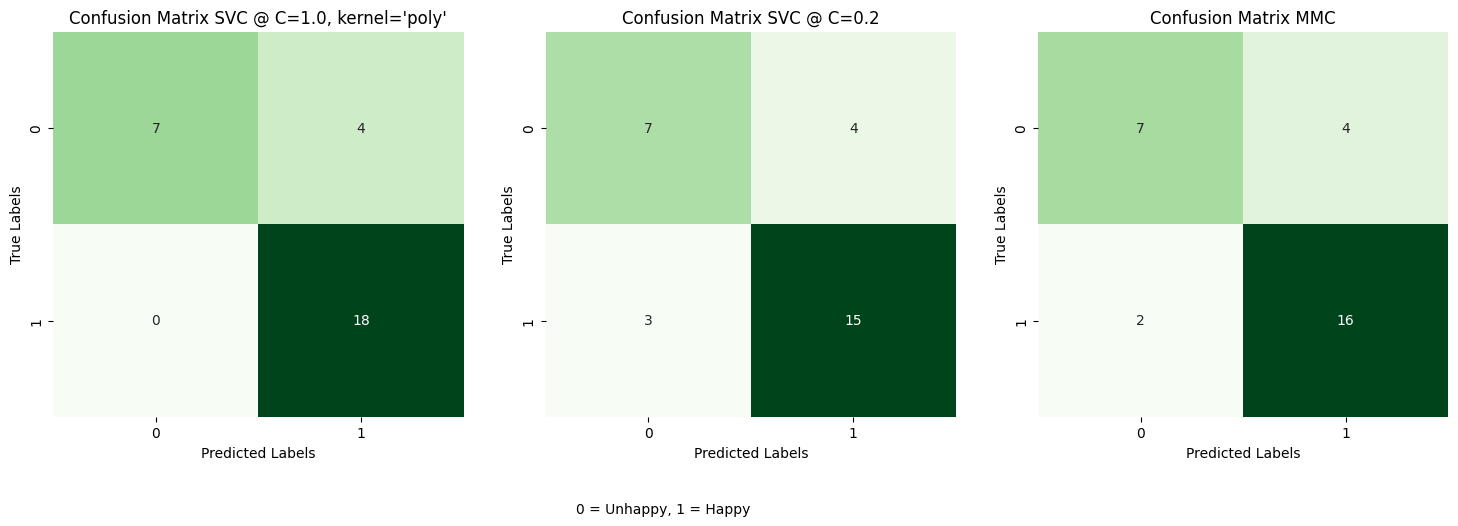

In [ ]:
# Create and train the Maximal Margin Classifier for C=1, kernel='poly'
svm_classifier_1 = SVC(kernel='poly', C=1.0)
svm_classifier_1.fit(X_train, y_train)

# Create and train the Maximal Margin Classifier for C=0.2
svm_classifier_2 = SVC(kernel='linear', C=0.2)
svm_classifier_2.fit(X_train, y_train)

# Create and train the Maximal Margin Classifier for C=1000
svm_classifier_3 = SVC(kernel='linear', C=1000)
svm_classifier_3.fit(X_train, y_train)

# Make predictions on the test data for all models
y_pred_1 = svm_classifier_1.predict(X_test)
y_pred_2 = svm_classifier_2.predict(X_test)
y_pred_3 = svm_classifier_3.predict(X_test)

# Calculate the confusion matrices
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot the first confusion matrix
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_title("Confusion Matrix SVC @ C=1.0, kernel='poly'")

# Plot the second confusion matrix
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Confusion Matrix SVC @ C=0.2')
axes[1].text(0.5, -0.25, '0 = Unhappy, 1 = Happy', horizontalalignment='right', transform=axes[1].transAxes)

# Plot the third confusion matrix
sns.heatmap(conf_matrix_3, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[2])
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')
axes[2].set_title('Confusion Matrix MMC')

plt.show()

As demonstrated in the results above, the **Support Vector Machine with C=1.0 and kernel='poly' exhibits improved performance in correctly classifying happy citizens**. Its accuracy in predicting unhappy citizens remains unchanged. In practical scenarios, we would likely prefer to observe our data more closely and test on more abundant external data as the model may simply be overfit to the sample.


## Kernel Principal Component Analysis

**Kernel Principal Component Analysis (Kernel PCA)** is an extension of Principal Component Analysis (PCA) that allows for nonlinear dimensionality reduction. Traditional PCA is effective at capturing linear relationships in data, but it may fail to capture complex nonlinear patterns. Kernel PCA addresses this limitation by applying kernel functions to transform the data into a higher-dimensional space where nonlinear relationships can be linearly represented.

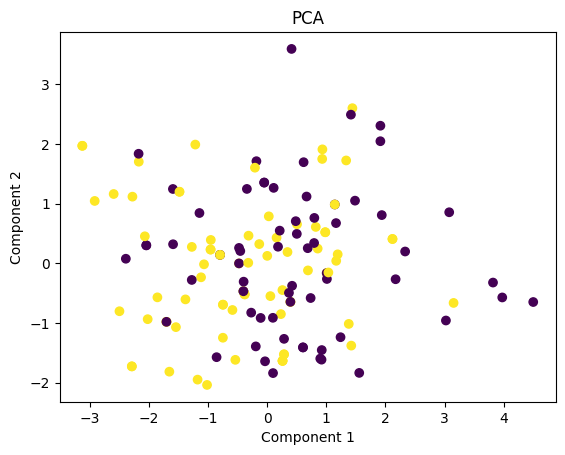

In [ ]:
from sklearn.decomposition  import PCA

# Let's apply PCA to this dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_X)

plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, df_y, test_size=0.2, random_state=88)

# LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6896551724137931


As you can see, PCA failed to reliably discriminate the two classes.   

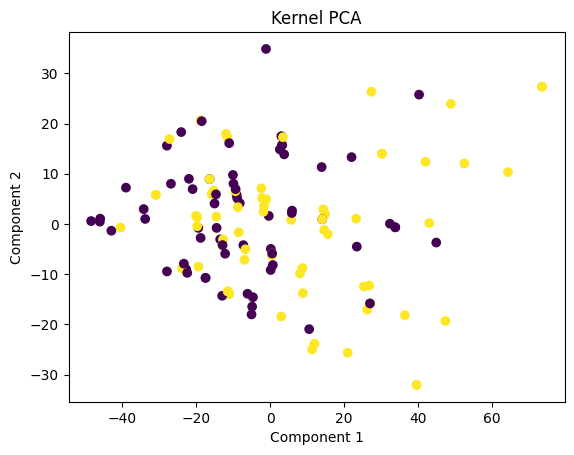

In [ ]:
from sklearn.decomposition import KernelPCA

# Let's apply an RBF kernel now
kpca = KernelPCA(n_components=2, kernel="poly")
X_kpca = kpca.fit_transform(df_X)

plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=df_y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [ ]:
# split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_kpca, df_y, test_size=0.2, random_state=88)

# LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7241379310344828


As demonstrated in the results above, the **Kernel PCA improves performance when conducting a simple logistic regression classification task**. This version of PCA better retains the most important patterns and variations in the data.
